# Gradient Descent Methods

This tour explores the use of gradient descent method for unconstrained and constrained optimization of a smooth function

*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_python/) for details about how to install the toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$


In [1]:
using PyPlot
using NtToolBox
# using Autoreload
# arequire("NtToolBox")

## Gradient Descent for Unconstrained Problems

We consider the problem of finding a minimum of a function $f$, hence solving
$$\umin{x \in \RR^d} f(x)$$
where $f : \RR^d \rightarrow \RR$ is a smooth function.

Note that the minimum is not necessarily unique.
In the general case, $f$ might exhibit local minima, in which case the proposed algorithms is not expected to find a global minimizer of the problem.
In this tour, we restrict our attention to convex function, so that the methods will converge to a global minimizer.

The simplest method is the gradient descent, that computes
$$ x^{(k+1)} = x^{(k)} - \tau_k \nabla f(x^{(k)}), $$
where $\tau_k>0$ is a step size, and $\nabla f(x) \in \RR^d$ is the gradient of $f$ at the point $x$, and $x^{(0)} \in \RR^d$ is any initial point.

In the convex case, if $f$ is of class $C^2$, in order to ensure convergence, the step size should satisfy
$$ 0 < \tau_k < \frac{2}{ \sup_x \norm{Hf(x)} } $$
where $Hf(x) \in \RR^{d \times d}$ is the Hessian of $f$ at $x$ and $\norm{\cdot}$ is the spectral operator norm (largest eigenvalue). 

## Gradient Descent in 2-D

We consider a simple problem, corresponding to the minimization of a 2-D quadratic form
$$ f(x) = \frac{1}{2} \pa{ x_1^2 + \eta x_2^2 } ,$$
where $\eta>0$ controls the anisotropy, and hence the difficulty, of the problem.

Anisotropy parameter $\eta$.

In [2]:
eta = 10;

Function $f$.

In [3]:
f = x -> ( x[1,1]^2 + eta*x[2, 1]^2 ) / 2;

Background image of the function.

In [4]:
include("NtToolBox/src/ndgrid.jl")
t = linspace(-.7,.7,101)
(u, v) = meshgrid(t,t)
F = ( u .^ 2 + eta .* v .^ 2 ) ./ 2;

Display the function as a 2-D image.

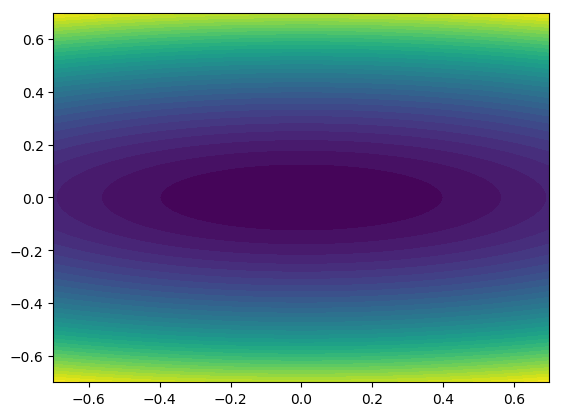

PyObject <matplotlib.contour.QuadContourSet object at 0x32e070810>

In [5]:
contourf(t, t, F, 35)

Gradient.

In [6]:
GradF = x -> [[x[1, 1]],[eta.*x[2, 1]]];

The step size should satisfy $\tau_k < 2/\eta$.
We use here a constant step size.

In [7]:
tau = 1.8/eta;

_Exercice 1:_
Perform the gradient descent using a fixed step size $\tau_k=\tau$.
Display the decay of the energy $f(x^{(k)})$ through the iteration.
Save the iterates so that |X(:,k)| corresponds to $x^{(k)}$.

In [8]:
## Insert your code here.

Display the iterations.

In [9]:
#contourf(t,t,Jmesh,35)
#plot(X[0,:], X[1,:], 'k.-')

Display the iteration for several different step sizes.

In [10]:
## Insert your code here.

## Gradient and Divergence of Images

Local differential operators like gradient, divergence and laplacian are the building blocks for variational image processing.

Load an image $x_0 \in \RR^N$ of $N=n \times n$ pixels.

In [11]:
n = 256
name = "NtToolBox/src/data/lena.png"
x0 = load_image(name, n);

Display it.

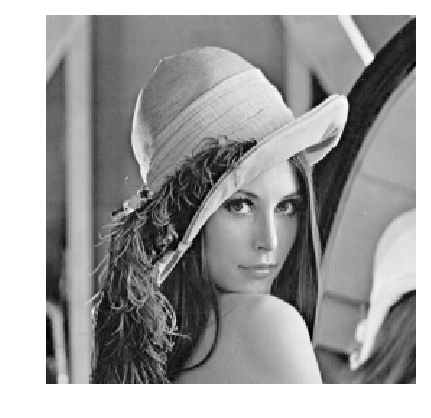

In [12]:
imageplot(x0)

For a continuous function $g$, the gradient reads
$$\nabla g(s) = \pa{ \pd{g(s)}{s_1}, \pd{g(s)}{s_2} } \in \RR^2.$$
(note that here, the variable $d$ denotes the 2-D spacial position).

We discretize this differential operator on a discrete image $x \in \RR^N$ using first order finite differences. 
$$(\nabla x)_i = ( x_{i_1,i_2}-x_{i_1-1,i_2}, x_{i_1,i_2}-x_{i_1,i_2-1} ) \in \RR^2.$$
Note that for simplity we use periodic boundary conditions.

Compute its gradient, using finite differences.

In [13]:
grad = x -> cat(3, x - [x[end, :]'; x[1:end-1, :]], x - [x[:, end] x[:,1:end-1]]);

One thus has $\nabla : \RR^N \mapsto \RR^{N \times 2}.$

In [14]:
v = grad(x0);

One can display each of its components.

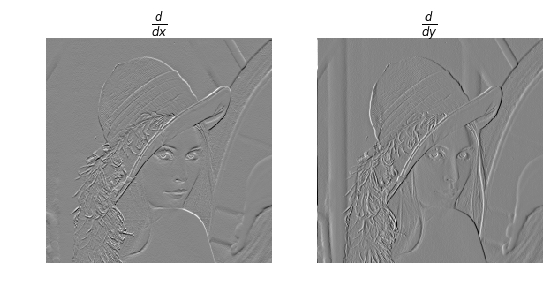

PyObject <matplotlib.text.Text object at 0x3322f0110>

In [15]:
imageplot(v[:,:,1], L"\frac{d}{dx}", (1,2,1))
imageplot(v[:,:,2], L"\frac{d}{dy}", (1,2,2))

One can display its magnitude $\norm{(\nabla x)_i}$, which is large near edges.

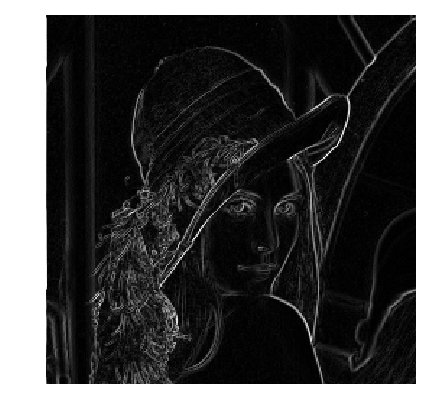

In [16]:
imageplot(sqrt(sum(v .* v, 3))[:, :])

The divergence operator maps vector field to images. 
For continuous vector fields \(v(s) \in \RR^2\), it is defined as
$$\text{div}(v)(s) = \pd{v_1(s)}{s_1} +  \pd{v_2(s)}{s_2} \in \RR.$$
(note that here, the variable \(s\) denotes the 2-D spacial position).
It is minus the adjoint of the gadient, i.e. $\text{div} = - \nabla^*$.

It is discretized, for $v=(v^1,v^2)$ as
$$\text{div}(v)_i = v^1_{i_1+1,i_2} - v^1_{i_1,i_2} + v^2_{i_1,i_2+1} - v^2_{i_1,i_2} .$$

In [17]:
diiv = v -> [v[2:end, :, 1]; v[1, :, 1]'] - v[:, :, 1] + [v[:, 2:end, 2] v[:, 1, 2]] - v[:, :, 2]; # Pour ne pas avoir conflit avec la fonction div de Julia.

The Laplacian operatore is defined as $\Delta=\text{div} \circ  \nabla = -\nabla^* \circ \nabla$.
It is thus a negative symmetric operator.

In [18]:
delta = x -> diiv(grad(x));

Display $\Delta x_0$.

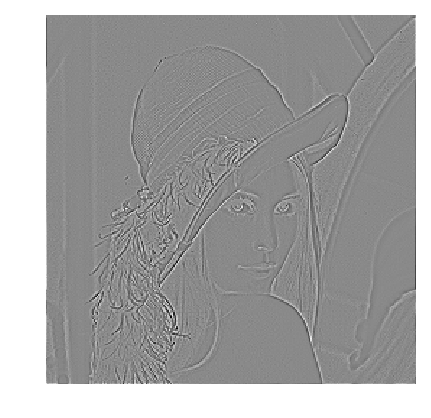

In [19]:
imageplot(delta(x0))

Check that the relation $\norm{\nabla x} = - \dotp{\Delta x}{x}.$

In [20]:
print("Should be 0:\n", sum(grad(x0) .* grad(x0)) + sum(delta(x0) .* x0) )

Should be 0:
0.0

## Gradient Descent in Image Processing

We consider now the problem of denoising an image $y \in \RR^d$ where $d = n \times n$ is the number of pixels ($n$ being the number of rows/columns in the image).

Add noise to the original image, to simulate a noisy image.

In [21]:
sigma = 0.1
y = x0 + sigma .* randn(n,n);

Display the noisy image $y$.

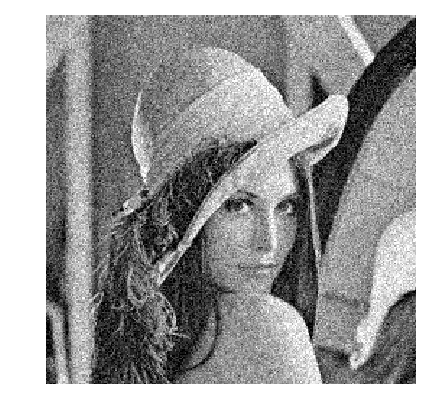

In [22]:
imageplot(clamP(y))

Denoising is obtained by minimizing the following functional
$$\umin{x \in \RR^d} f(x) = \frac{1}{2} \norm{y-x}^2 + \la J_\epsilon(x)$$
where $J_\epsilon(x)$ is a smoothed total variation of the image.
$$J_\epsilon(x) = \sum_i \norm{ (G x)_i }_{\epsilon}$$
where $(Gx)_i \in \RR^2$ is an approximation of the gradient of $x$ at pixel $i$ and for $u \in \RR^2$, we use the following smoothing of the $L^2$ norm in $\RR^2$
$$\norm{u}_\epsilon = \sqrt{ \epsilon^2 + \norm{u}^2 },$$
for a small value of $\epsilon>0$.

The gradient of the functional read
$$\nabla f(x) = x-y + \lambda \nabla J_\epsilon(x)$$
where the gradient of the smoothed TV norm is
$$\nabla J_\epsilon(x)_i = G^*( u ) \qwhereq u_i = \frac{ (G x)_i }{\norm{ (G x)_i }_\epsilon} $$
where $G^*$ is the adjoint operator of $G$ which corresponds to minus a discretized divergence

Value for $\lambda$.

In [23]:
la = 0.3 / 5;

Value for $\epsilon$.

In [24]:
epsilon = 1e-3;

TV norm.

In [25]:
norm_eps = u -> sqrt(eps^2 + sum(u .* u, 3))
J = x -> sum(sum(norm_eps(grad(x))));

Function $f$ to minimize.

In [26]:
f = x -> 1/2 ^ norm(x - y)^2 + la .* J(x);

Gradient of $J_\epsilon$. Note that |div| implement $-G^*$.

In [27]:
normalize_vec = (u, epsilon) -> u ./ repeat(reshape(NormEps(u,epsilon), (1, 1, 2)), inner = [size(NormEps(u,epsilon))[1], size(NormEps(u,epsilon))[2], 1])
gradTV = x -> - divergence(normalize_vec(grad(x)));

Gradient of the functional.

In [28]:
Gradf = x -> x - y + la .* gradTV(x);

The step size should satisfy
$$0 < \tau_k < \frac{2}{ 1 + 4 \lambda / \epsilon }.$$
Here we use a slightly larger step size, which still work in practice.

In [29]:
tau = 1.8/( 1 + la*8/epsilon )
tau = tau*4;

_Exercice 3:_
Implement the gradient descent. Monitor the decay of $f$ through the iterations.

In [30]:
## Insert your code here.

Display the resulting denoised image.

In [31]:
#imageplot(clamp(x))

## Constrained Optimization Using Projected Gradient Descent

We consider a linear imaging operator $\Phi : x \mapsto \Phi(x)$ that maps high resolution images to low dimensional observations.
Here we consider a pixel masking operator, that is diagonal over the spacial domain.

To emphasis the effect of the TV functional, we use a simple geometric image.

In [32]:
n = 64
radius = 0.6
t = linspace(-1,1,n)
(Y,X) = meshgrid(t,t)
x0 = (max( abs(X), abs(Y) ) .< radius) .* 1.0;

We consider here the inpainting problem.
This simply corresponds to a masking operator.
Here we remove the central part of the image.

In [33]:
a = 4
Lambda = ones(n, n)
Lambda[Int(n/2) - a : Int(n/2) + a, :] = 0;

Masking operator $\Phi$.
Note that it is symmetric, i.e. $\Phi^*=\Phi$.

In [34]:
Phi  = x -> x .* Lambda
PhiS = Phi;

Noiseless observations $y=\Phi x_0$.

In [35]:
y = Phi(x0);

Display.

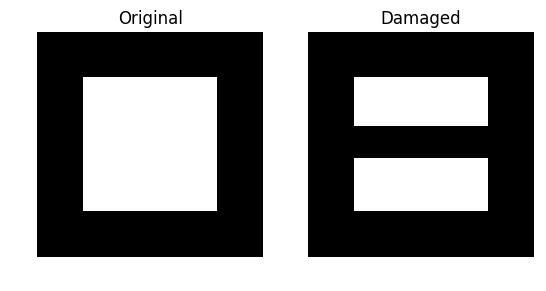

PyObject <matplotlib.text.Text object at 0x32e4320d0>

In [36]:
imageplot(x0, "Original", (1,2,1))
imageplot(y, "Damaged", (1,2,2))

We want to solve the noiseless inverse problem $y=\Phi f$ using a total variation regularization:
$$\umin{ y=\Phi x } J_\epsilon(x).$$
We use the following projected gradient descent
$$x^{(k+1)} = \text{Proj}_{\Hh}( x^{(k)} - \tau_k \nabla J_{\epsilon}(x^{(k)}) )$$
where $\text{Proj}_{\Hh}$ is the orthogonal projection on the set of linear constraint $\Phi x = y$, and is easy to compute for inpainting

In [37]:
ProjH = x -> x + PhiS( y - Phi(x) );

_Exercice 4:_
Display the evolution of the inpainting process.

In [38]:
## Insert your code here.

_Exercice 5:_
Try with several values of $\epsilon$.

In [39]:
## Insert your code here.